# OLLA Code

The One Layer Land Atmosphere Code. :) 

In [1]:
# Import obligatory packages.

import numpy as np
import matplotlib.pyplot as plt 
import xarray as xr
import glob
import random

from getStats import getStats, getRemoveDefects
from getForcingFunctions import getForcingNetCDF
from getOLLA import getOLLA

In [2]:
# Import files into current terminal.

PATH="/data/keeling/a/adammb4/SGP_proj_2021/DATA/"
precip_data=glob.glob(PATH+"SGP_precip*")
rad_data = glob.glob(PATH+"SGP_Best*")

precip_data_var = "precip"
rad_data_var = "BestEstimate_down_short_hemisp"

#hum_data = glob.glob(PATH+"entirely different.nc")
#temp_data = glob.glob(PATH+"sheik.nc")

#ds1 = xr.open_dataset(rad_data[0])
#ds2 = xr.open_dataset(precip_data[3])

#rad = getRemoveDefects(ds1["BestEstimate_down_short_hemisp"].values, rad_data_var)
#prec = getRemoveDefects(ds2["precip"].values, "precip")
#radsplit = np.split(rad, 92)

#fig, ax = plt.subplots(1, figsize=(14,10))

#for i in range(0,92):
    #tup = (random.random(), random.random(), random.random())
    #ax.plot(radsplit[i][660:1440], color=tup)
    #ax.plot(radsplit[i][0:60], color=tup)  
#ax.set_ylim(0,1400)

In [3]:
# Send files to statistics program to generate relevant statistical quantities.

# Data variable names are "precip" and "BestEstimate_down_short_hemisp" for precipitation and radiation, respectively.
# This has been updated IN getStats.py. 

threshold = 0

stats_array = getStats(rad_data, rad_data_var, precip_data, precip_data_var, threshold)

stats_array

array([3.31523729e+02, 1.29007507e+03, 1.04830119e+03, 1.48781738e+02,
       2.29757000e+02, 3.19076177e-02, 2.79184049e-01])

In [4]:
## Pass resulting statistical quantities to a program that returns a red forcing .nc that is calibrated to said 
# statistical quantities; also pass the filename for ease of reference in next step

tot_years = 2
filename = "SGP_synth_20sum"

getForcingNetCDF(tot_years, stats_array, PATH+filename+".nc")

# THIS IS SAVED TO PATH ABOVE NOT TO LOCAL DIRECTORY

226.97310689179176


In [5]:
# Import .nc as forcing

forcing = glob.glob(PATH+filename+".nc")

#ds = xr.open_dataset(forcing[0])
#forcing4 = ds["F_solar"].values
#plt.plot(forcing4[:,0])
#plt.xlim(0,1440*2)

In [6]:
# Send forcing information to OLLA

# Might need for loop situation here, but basic idea is 

temp_array, mois_array = getOLLA(forcing)

Text(0.5, 0, 'Minute')

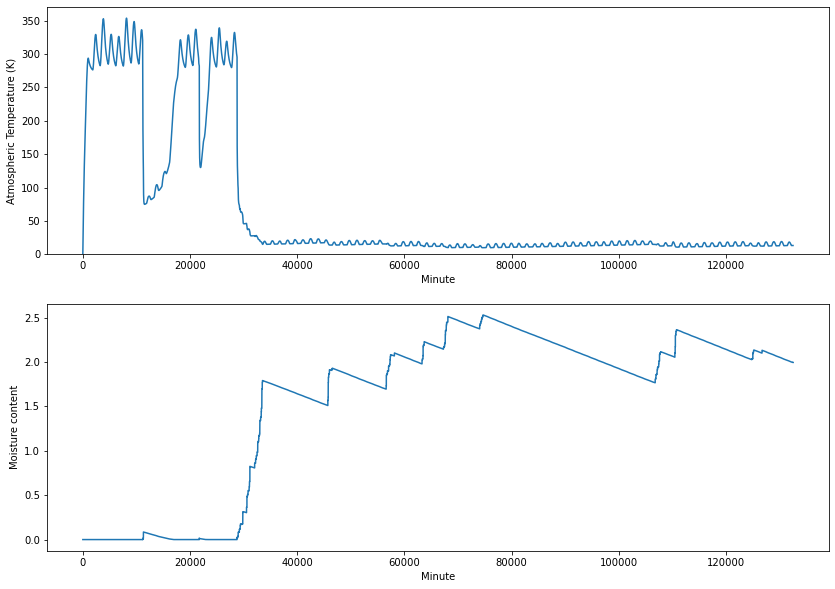

In [7]:
# Print & plot the results from OLLA

# Generic plotting business

fig, ax = plt.subplots(2, figsize=(14,10))

ax[0].plot(temp_array[:,0])
ax[0].set_ylim((0, 370))
ax[0].set_ylabel(r"Atmospheric Temperature (K)")
ax[0].set_xlabel(r"Minute")

ax[1].plot(mois_array[:,0])
ax[1].set_ylabel(r"Moisture content")
ax[1].set_xlabel(r"Minute")
#ax[1].set_ylim((0,10**(-4)))